# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [4]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [5]:
hist = {}

for x in t:        
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [6]:
from collections import Counter

counter = Counter(t)

counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

In [7]:
[print(el) for el in counter.elements()]

1
2
2
3
5


[None, None, None, None, None]

In [8]:
nums = [1,2,3]
letrs = ['a','b','c']



Or you can use the `Hist` object provided by `thinkstats2`:

In [9]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [10]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [11]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [12]:
hist[4]

0

The `Values` method returns the values:

In [13]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [14]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [15]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

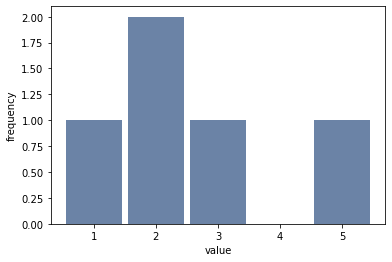

In [16]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [17]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

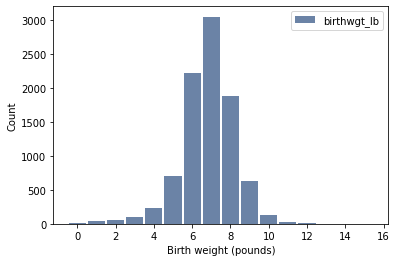

In [18]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [19]:
ages = np.floor(live.agepreg)

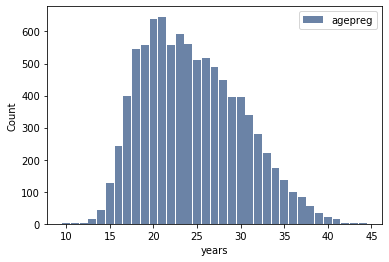

In [20]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

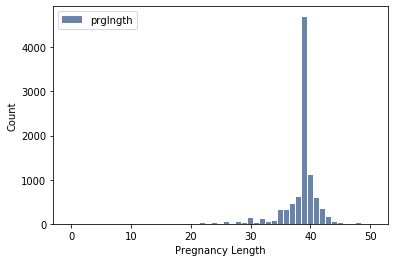

In [26]:
histogram=thinkstats2.Hist(live.prglngth,label='prglngth')
thinkplot.Hist(histogram)
thinkplot.Config(xlabel='Pregnancy Length', ylabel='Count')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [23]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [27]:
for weeks,freq in hist.Largest(10):
    print(weeks,freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [28]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

In [29]:
first_hist.Total()

4413

In [30]:
other_hist.Total()

4735

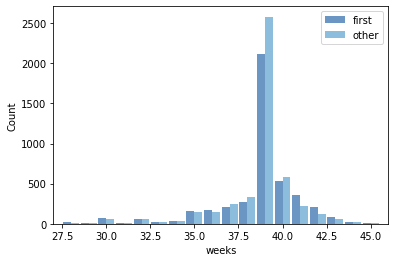

In [30]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

In [40]:
import matplotlib.pyplot as plt

In [44]:
firsts.prglngth

0        39
2        39
5        38
8        39
10       39
         ..
13576    39
13578    39
13581    39
13584    34
13588    39
Name: prglngth, Length: 4413, dtype: int64

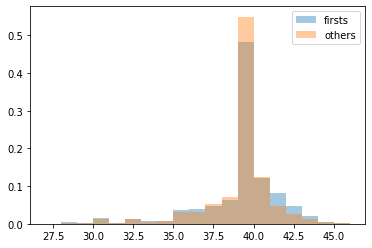

In [53]:
bins = np.linspace(27, 46, 20)

plt.hist(firsts.prglngth, bins, alpha=0.4, label='firsts', density = True)
plt.hist(others.prglngth, bins, alpha=0.4, label='others', density = True)
plt.legend()

`Series` provides methods to compute summary statistics:

In [33]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [34]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [50]:
import math

assert (std == math.sqrt(var)), "It is not equal"

Here's are the mean pregnancy lengths for first babies and others:

In [51]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [58]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [59]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [60]:
CohenEffectSize(firsts.prglngth,others.prglngth)

0.028879044654449883

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [68]:
print("firsts average total birth weight: ", firsts.totalwgt_lb.mean())
print("others average total birth weight: ", others.totalwgt_lb.mean())
print("others average total birth weight is heavier than first by", -firsts.totalwgt_lb.mean()+others.totalwgt_lb.mean())
# From the average value, we could tell that first babies are lighter than others 

firsts average total birth weight:  7.201094430437772
others average total birth weight:  7.325855614973262
others average total birth weight is heavier than first by 0.12476118453549034


In [74]:
print("Cohen's D for total weight in pounds " + str(CohenEffectSize(firsts.totalwgt_lb,others.totalwgt_lb)))

Cohen D for total weight in pounds -0.088672927072602


In [81]:
print("Cohen's D for pregnancy length " + str(CohenEffectSize(firsts.prglngth,others.prglngth)))

print("Cohen's D for both totalweight and pregnancy between firsts and others are significantly small. We could somehow say that the totalweight of first borns is lighter than those who were born later.")

Cohen's D for pregnancy length 0.028879044654449883
Cohen's D for both totalweight and pregnancy between firsts and others are significantly small. We could somehow say that the totalweight of first borns is lighter than those who were born later.


For the next few exercises, we'll load the respondent file:

In [82]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

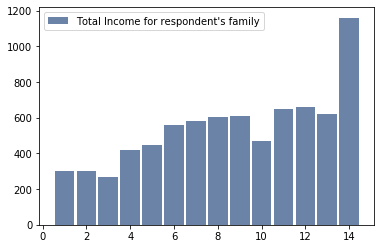

<Figure size 576x432 with 0 Axes>

In [92]:
# Solution goes here
histogram = thinkstats2.Hist(resp.totincr)
thinkplot.Hist(histogram,label="Total Income for respondent's family")
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

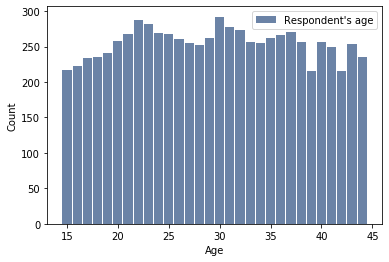

In [96]:
# Solution goes here
histogram = thinkstats2.Hist(resp.ager)
thinkplot.Hist(histogram,label="Respondent's age")
thinkplot.Config(xlabel='Age', ylabel='Count')

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

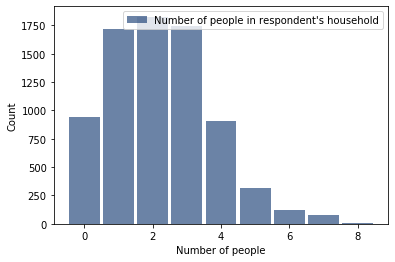

In [99]:
# Solution goes here
histogram = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(histogram,label="Number of people in respondent's household")
thinkplot.Config(xlabel='Number of people', ylabel='Count')

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

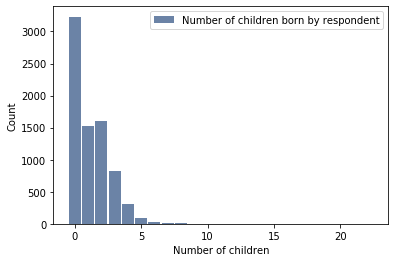

In [100]:
# Solution goes here
histogram = thinkstats2.Hist(resp.parity)
thinkplot.Hist(histogram,label="Number of children born by respondent")
thinkplot.Config(xlabel='Number of children', ylabel='Count')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [108]:
# Solution goes here
histogram.Largest(10)

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

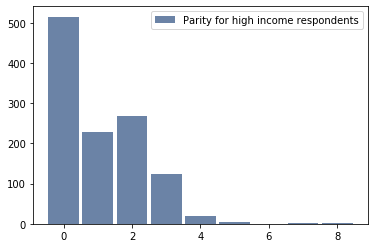

<Figure size 576x432 with 0 Axes>

In [113]:
# Solution goes here
high_income=resp[resp.totincr==14]
histogram = thinkstats2.Hist(high_income.parity)
thinkplot.Hist(histogram,label="Parity for high income respondents")
thinkplot.Show()

Find the largest parities for high income respondents.

In [114]:
# Solution goes here
histogram.Largest(10)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123), (2, 267), (1, 229), (0, 515)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [121]:
# Solution goes here
others_income=resp[resp.totincr<14]
print("High income parity",high_income.parity.mean())
print("Others income parity",others_income.parity.mean())
print("Others income has a higher parity than High income with a difference of", others_income.parity.mean()-high_income.parity.mean())

High income parity 1.0758620689655172
Others income parity 1.2495758136665125
Others income has a higher parity than High income with a difference of 0.17371374470099532


Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [130]:
# Solution goes here
print("Cohen's D for parity",CohenEffectSize(high_income.parity,others_income.parity))
print("Cohen's D for pregnancy length",CohenEffectSize(firsts.prglngth,others.prglngth))
print("We could see that Cohen's D for parity is significantly larger than pregnancy length. Therefore we could somehow say that there is a difference or changes in parity for those with higher and lower incomes")

Cohen's D for parity -0.1251185531466061
Cohen's D for pregnancy length 0.028879044654449883
We could see that Cohen's D for parity is significantly larger than pregnancy length. Therefore we could somehow say that there is a difference or changes in parity for those with higher and lower incomes
